In [1]:
import numpy as np
import matplotlib.pyplot as plt


1. Initialisation du maillage - ici on veut trouver les points de notre maillag qui représentent des sites

sites: [(0, 1), (0, 2), (1, 0), (2, 1), (2, 2)]
grid: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


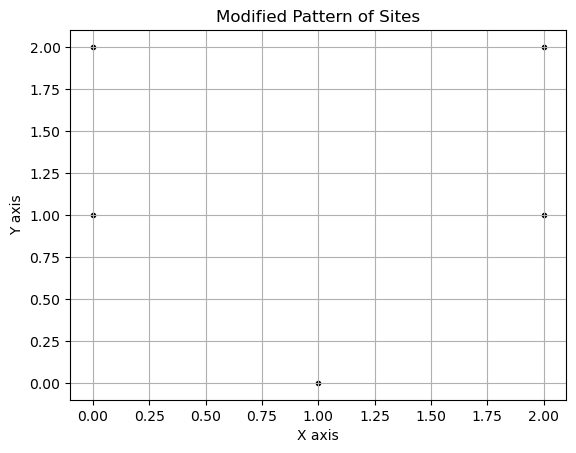

In [37]:
width = 3 #axe x, direction zigzag
height = 3 #axe y, direction armchair

#génération des la grille
def generate_grid(h, w):
    return [(x, y) for x in range(h) for y in range(w)]

grid = generate_grid(height, width)


sites = []

for x in range(width):
    if x % 2 == 0:  # Colonnes paires
        for y in range(height):
            if y % 4 in [1, 2]:  # 1,2,5,6,9,10, ...
                sites.append((x, y))
    else:  # Colonnes impaires
        for y in range(height):
            if y % 4 in [0, 3]:  # 3,4,7,8,11,12, ...
                sites.append((x, y))

# Affichage
for i in sites:
    plt.scatter(i[0], i[1], marker = '.', color='black')

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Modified Pattern of Sites")
plt.grid()
print('sites:', sites)
print('grid:', grid)
plt.show()


2. Initialisation du hamiltonien en fonction des dimensions du flocon

\begin{align}
\mathcal{H} = \epsilon \sum_{x,y} \Bigl[\hat{a}^\dagger(x,y)\hat{a}_(x,y)\Bigr] 
&- t \sum_{x} \sum_{y}\Bigl[\hat{a}^\dagger(x,y)\hat{a}(x-1,y) + \hat{a}^\dagger(x+1,y)\hat{a}(x,y) + \text{c.h.} \Bigr] \\&- t \sum_{x}\Bigl[\sum_{y\text{ impair}}\hat{a}^\dagger(x,y)\hat{a}(x,y-1) + \sum_{y\text{ pair}} \hat{a}^\dagger(x,y+1)\hat{a}(x,y) + \text{c.h.}\Bigl]\nonumber
\end{align}

In [39]:
H = np.zeros((len(grid), len(grid)))
t = -1.0   

# Sauts direction zigzag:
for index in range(len(grid)):
    if grid[index] in sites:
        print(index, grid[index])

        # Sauts direction zigzag:
        s = grid[index]
        x = s[0]  # position x du site
        y = s[1]  # position y du site

        for index_new in range(len(grid)):
            if (x+1,y) == grid[index_new]:
                H[index, index_new] = t
                H[index_new, index] = t
            if (x-1,y) == grid[index_new]:
                H[index, index_new] = t
                H[index_new, index] = t
print(H)

1 (0, 1)
2 (0, 2)
3 (1, 0)
7 (2, 1)
8 (2, 2)
[[ 0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]]


In [ ]:
# Paramètres
a = 1.0                    # Constante de réseau
t = -1.0                   # Amplitude de saut intra–cellule
te = -1.0 * 1.12           # Amplitude de saut inter–cellule

def hamiltonian_k(k, N, a, t, te):
    """
    Construit la matrice du Hamiltonien H(k) de dimension 2N x 2N,
    dans la base [a1, b1, a2, b2, ..., aN, bN].

    - Sauts intra–cellule : pour chaque cellule m,
      H[2*m-2, 2*m-1] = t et H[2*m-1, 2*m-2] = t.

    - Sauts inter–cellule (de la cellule m à m+1 pour m = 1,..,N-1) :
      * Type 1 : entre b_m et a_{m+1} (sans phase) : H[2*m-1, 2*(m+1)-2] = te.
      * Type 2 : entre a_m et b_{m+1} (avec phase) : H[2*m-2, 2*(m+1)-1] = te * exp(-1j*k*a).
    """
    H = np.zeros((len(sites), len(sites)), dtype=complex)

    # Sauts direction zigzag:
    for index, s in len(sites),sites:
        i = s[0]  # position x du site
        j = s[1]  # position y du site
        H[i, j] = t
        H[j, i] = t

    # Sauts inter–cellule : pour m de 1 à N-1 (entre cellule m et m+1)
    for m in range(1, N):
        # Type 1 : liaison entre b_m (cellule m) et a_{m+1} (cellule m+1) sans phase
        i = 2*m - 1              # indice de b_m
        j = 2*(m + 1) - 2        # indice de a_{m+1}
        H[i, j] = te
        H[j, i] = te

        # Type 2 : liaison entre a_m (cellule m) et b_{m+1} (cellule m+1) avec facteur de phase e^{-ik*a}
        i = 2*m - 2              # indice de a_m
        j = 2*(m + 1) - 1        # indice de b_{m+1}
        H[i, j] = te * np.exp(-1j * k * a)
        H[j, i] = te * np.exp(1j * k * a)

    return H